In [1]:
import sys
sys.path.append('..')
import os
import numpy as np
import pandas as pd
from __future__ import annotations
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import (
    cross_val_score,
    GridSearchCV,
    KFold,
    RandomizedSearchCV,
)
from sklearn.preprocessing import (
    MaxAbsScaler,
    MinMaxScaler,
    RobustScaler,
    StandardScaler,
)
from scipy.stats import uniform, randint
from sklearn.ensemble import AdaBoostClassifier
import jupyter_black

jupyter_black.load()

In [2]:
# Load data
df_initial = pd.read_csv("../data/train.csv")

from utils.features import FeatureEngineering
from utils.model_eval import ModelEvaluation



In [3]:
# Initiate FeatureEngineering and ModelEvaluation class
FE = FeatureEngineering()
CV = ModelEvaluation()

In [4]:
df = df_initial.copy()

# Preprocess step, scale data
FE.scaling(df, method="standard")

# Encode class column to numeric values
FE.encode_class_column(df)

# Get Features and Target
features = df[df.columns.drop(["Lead"])]
target = df["Lead"]

,Number words female,Total words,Number of words lead,Difference in words lead and co-lead,Number of male actors,Year,Number of female actors,Number words male,Gross,Mean Age Male,...,Yearly mean diff Number of words lead,Yearly mean diff Difference in words lead and co-lead,Yearly mean diff Number of male actors,Yearly mean diff Number of female actors,Yearly mean diff Number words male,Yearly mean diff Gross,Yearly mean diff Mean Age Male,Yearly mean diff Mean Age Female,Yearly mean diff Age Lead,Yearly mean diff Age Co-Lead
0,-0.381349,-0.676591,-0.623279,-0.873668,-1.478906,-0.467462,0.715098,-0.565204,0.203383,1.170591,...,1.184897,1.402539,1.806643,-4.201295e-01,1.020679,-0.490362,-1.336836,-0.904990,-0.426945,-2.619605
1,-0.375783,-0.326435,-0.700801,-0.522923,0.316168,0.109371,0.236061,0.197337,-0.488825,-0.413237,...,0.848224,0.611503,-0.204871,-3.061895e-01,-0.227576,0.522117,-0.028556,0.411790,-1.860176,-0.035262
2,-1.010703,-1.002092,-1.062568,-0.695893,-0.196710,-3.063211,-1.201051,-0.434064,1.746018,0.018716,...,0.263223,0.054247,0.392080,-2.021110e-17,0.137891,-0.773340,0.080321,0.527427,-0.041713,0.391406
3,-0.584950,-0.168675,-0.224261,0.039229,1.085485,0.205509,-0.722014,0.228365,-0.607490,-0.912739,...,0.019162,-0.230890,-1.102063,5.724412e-01,-0.387545,0.695474,0.715372,1.553825,0.383309,0.973225
4,-0.471787,-0.486691,-0.091703,0.249836,0.059729,-1.140434,0.236061,-0.593012,-0.469048,0.370678,...,-0.256289,-0.428968,-0.139406,-2.627017e-01,0.255981,0.640912,-0.546832,-1.372092,-0.200223,-0.139166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,-0.942063,-1.263021,-0.931016,-0.544144,-0.709588,-2.582517,-0.722014,-1.112594,0.414341,0.108306,...,0.121943,-0.058475,0.914853,4.925656e-01,0.830533,1.940933,-0.427261,-0.058603,-0.604839,0.630598
1035,-0.789478,-0.381615,-0.723621,-0.936129,-0.453149,-0.755879,-0.722014,0.368287,0.401156,-0.663877,...,0.625554,0.898092,0.683627,3.031173e-01,-0.460057,-0.426912,0.574432,0.917481,1.296313,0.073598
1036,-0.467613,-1.211363,-1.084381,-0.868463,-1.478906,0.013232,-0.242976,-1.175236,-0.383346,-1.901076,...,1.318231,1.025117,1.568320,1.204049e-01,1.303347,0.310684,1.805620,0.806359,0.860216,0.784744
1037,-0.868321,-1.028801,-1.118612,-0.990182,0.059729,-0.371324,-0.242976,-0.528321,-0.521788,0.064425,...,0.983198,0.896523,0.110891,1.641885e-01,0.740587,0.556456,0.009510,-0.409629,0.836789,0.050079


### Build weak learner - Tree Classifier

In [14]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier as tree

# Create tree model
tree_model = tree(max_depth=1)

# Evaluate tree model
CV.cross_val(tree_model, features, target, 5)

----------- Cross-validation report -----------

Model: DecisionTreeClassifier(max_depth=1)

Feature set: ['Number words female', 'Total words', 'Number of words lead', 'Difference in words lead and co-lead', 'Number of male actors', 'Year', 'Number of female actors', 'Number words male', 'Gross', 'Mean Age Male', 'Mean Age Female', 'Age Lead', 'Age Co-Lead']

Number of folds: 5

Performance:
- Accuracy: 0.762 (avg), 0.755 (min), 0.769 (max)
- Accuracy, 95.0 % confidence interval: 0.668-0.856
- Accuracy, female: 0.028 (avg), 0.000 (min), 0.059 (max)
- Accuracy, male: 1.000 (avg), 1.000 (min), 1.000 (max)
- Training accuracy: 0.769 (avg), 0.756 (min), 0.779 (max)
---------------------------------------------



In [ ]:
# Calculate average false positive and negative rate
FpositiveRate = []
FnegativeRate = []
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(features, target)
    tree_model = tree(max_depth=1)
    tree_model.fit(X_train, y_train)
    pred = tree_model.predict(X_test)
    falseNegative = 0
    falsePositive = 0
    for p, t in zip(pred, y_test):
        if p == 1 and t == 0:
            falseNegative += 1
        if p == 0 and t == 1:
            falsePositive += 1
    # print("False positive rate:", falsePositive / len(y_test))
    FpositiveRate.append(falsePositive / len(y_test))
    # print("False negative rate:", falseNegative / len(y_test))
    FnegativeRate.append(falseNegative / len(y_test))
print("Average positive rate:", np.mean(FpositiveRate))
print("Average negative rate:", np.mean(FnegativeRate))

### Build AdaBoost Basic

In [15]:
# Create AdaBoost Classifier
Ada = AdaBoostClassifier()

# Evaluate Adaboost Basic
CV.cross_val(Ada, features, target, 5)

----------- Cross-validation report -----------

Model: AdaBoostClassifier()

Feature set: ['Number words female', 'Total words', 'Number of words lead', 'Difference in words lead and co-lead', 'Number of male actors', 'Year', 'Number of female actors', 'Number words male', 'Gross', 'Mean Age Male', 'Mean Age Female', 'Age Lead', 'Age Co-Lead']

Number of folds: 5

Performance:
- Accuracy: 0.858 (avg), 0.837 (min), 0.889 (max)
- Accuracy, 95.0 % confidence interval: 0.763-0.952
- Accuracy, female: 0.607 (avg), 0.471 (min), 0.680 (max)
- Accuracy, male: 0.939 (avg), 0.917 (min), 0.968 (max)
- Training accuracy: 0.917 (avg), 0.911 (min), 0.921 (max)
---------------------------------------------



In [ ]:
# Calculate average false positive and negative rate
FpositiveRate = []
FnegativeRate = []
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(features, target)
    Ada = AdaBoostClassifier()
    Ada.fit(X_train, y_train)
    pred = Ada.predict(X_test)
    falseNegative = 0
    falsePositive = 0
    for p, t in zip(pred, y_test):
        if p == 1 and t == 0:
            falseNegative += 1
        if p == 0 and t == 1:
            falsePositive += 1
    # print("False positive rate:", falsePositive / len(y_test))
    FpositiveRate.append(falsePositive / len(y_test))
    # print("False negative rate:", falseNegative / len(y_test))
    FnegativeRate.append(falseNegative / len(y_test))
print("Average positive rate:", np.mean(FpositiveRate))
print("Average negative rate:", np.mean(FnegativeRate))

### Build XGBoost Basic

In [16]:
import xgboost as xgb

# Create XGBoost model
xgb_model = xgb.XGBClassifier(objective="binary:logistic")

# Evaluate XGBoost
CV.cross_val(xgb_model, features, target, 5)

----------- Cross-validation report -----------

Model: XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

Feature set: ['Number words female', 'Total words', 'Number of words lead', 'Difference in words lead and co-lead', 'Number of male actors', 'Year', 'Number of female actors', 'Number words male', 'Gross', 'Mean Age Male', 'Mean 

In [ ]:
# Calculate average false positive and negative rate
FpositiveRate = []
FnegativeRate = []
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(features, target)
    xgb_model = xgb.XGBClassifier(objective="binary:logistic")
    xgb_model.fit(X_train, y_train)
    pred = xgb_model.predict(X_test)
    falseNegative = 0
    falsePositive = 0
    for p, t in zip(pred, y_test):
        if p == 1 and t == 0:
            falseNegative += 1
        if p == 0 and t == 1:
            falsePositive += 1
    # print("False positive rate:", falsePositive / len(y_test))
    FpositiveRate.append(falsePositive / len(y_test))
    # print("False negative rate:", falseNegative / len(y_test))
    FnegativeRate.append(falseNegative / len(y_test))
print("Average positive rate:", np.mean(FpositiveRate))
print("Average negative rate:", np.mean(FnegativeRate))

### Initial Select AdaBoost

In [18]:
initial_features = [
    "Number words female",
    "Total words",
    "Number of words lead",
    "Difference in words lead and co-lead",
    "Number of male actors",
    "Year",
    "Number of female actors",
    "Age Lead",
    "Age Co-Lead",
]

# Create AdaBoost Classifier
Ada = AdaBoostClassifier()

# Evaluate Adaboost Initial Select
CV.cross_val(Ada, df[initial_features], target, 5)

----------- Cross-validation report -----------

Model: AdaBoostClassifier()

Feature set: ['Number words female', 'Total words', 'Number of words lead', 'Difference in words lead and co-lead', 'Number of male actors', 'Year', 'Number of female actors', 'Age Lead', 'Age Co-Lead']

Number of folds: 5

Performance:
- Accuracy: 0.859 (avg), 0.832 (min), 0.894 (max)
- Accuracy, 95.0 % confidence interval: 0.765-0.954
- Accuracy, female: 0.622 (avg), 0.451 (min), 0.706 (max)
- Accuracy, male: 0.936 (avg), 0.904 (min), 0.968 (max)
- Training accuracy: 0.911 (avg), 0.905 (min), 0.921 (max)
---------------------------------------------



In [24]:
# Calculate average false positive and negative rate
FpositiveRate = []
FnegativeRate = []
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(df[initial_features], target)
    # Create AdaBoost Classifier
    Ada = AdaBoostClassifier()
    Ada.fit(X_train, y_train)
    pred = Ada.predict(X_test)
    falseNegative = 0
    falsePositive = 0
    for p, t in zip(pred, y_test):
        if p == 1 and t == 0:
            falseNegative += 1
        if p == 0 and t == 1:
            falsePositive += 1
    # print("False positive rate:", falsePositive / len(y_test))
    FpositiveRate.append(falsePositive / len(y_test))
    # print("False negative rate:", falseNegative / len(y_test))
    FnegativeRate.append(falseNegative / len(y_test))
print("Average positive rate:", np.mean(FpositiveRate))
print("Average negative rate:", np.mean(FnegativeRate))

Average positive rate: 0.04615384615384616
Average negative rate: 0.09307692307692308


### Initial Select XGBoost

In [19]:
initial_features = [
    "Number words female",
    "Total words",
    "Number of words lead",
    "Difference in words lead and co-lead",
    "Number of male actors",
    "Year",
    "Number of female actors",
    "Age Lead",
    "Age Co-Lead",
]
# Create XGBoost model
xgb_model = xgb.XGBClassifier(objective="binary:logistic")

# Evaluate XGBoost
CV.cross_val(xgb_model, df[initial_features], target, 5)

----------- Cross-validation report -----------

Model: XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

Feature set: ['Number words female', 'Total words', 'Number of words lead', 'Difference in words lead and co-lead', 'Number of male actors', 'Year', 'Number of female actors', 'Age Lead', 'Age Co-Lead']

Number of folds: 5

Perfo

In [25]:
# Calculate average false positive and negative rate
FpositiveRate = []
FnegativeRate = []
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(df[initial_features], target)
    xgb_model = xgb.XGBClassifier(objective="binary:logistic")
    xgb_model.fit(X_train, y_train)
    pred = xgb_model.predict(X_test)
    falseNegative = 0
    falsePositive = 0
    for p, t in zip(pred, y_test):
        if p == 1 and t == 0:
            falseNegative += 1
        if p == 0 and t == 1:
            falsePositive += 1
    # print("False positive rate:", falsePositive / len(y_test))
    FpositiveRate.append(falsePositive / len(y_test))
    # print("False negative rate:", falseNegative / len(y_test))
    FnegativeRate.append(falseNegative / len(y_test))
print("Average positive rate:", np.mean(FpositiveRate))
print("Average negative rate:", np.mean(FnegativeRate))

Average positive rate: 0.04615384615384615
Average negative rate: 0.0823076923076923


### Improved AdaBoost

#### Step 1: Feature Engineering
AdaBoost uses an exponential loss function, therefore, it is sensitive to outliers and uncertain data. We will try to scale the features with different scaling method to see if it affects the performance.

In [20]:
# Create AdaBoost Classifier
Ada = AdaBoostClassifier()

# Initialize unscaled df
df = df_initial.copy()

# Scaling with standard
FE.scaling(df, "Standard")
features = df[df.columns.drop("Lead")]
target = df["Lead"]

# Evaluate Adaboost
CV.cross_val(Ada, features, target, 5)

# Initialize unscaled df
df = df_initial.copy()

# Scaling with MinMax
FE.scaling(df, "MinMax")
features = df[df.columns.drop("Lead")]
target = df["Lead"]

# Evaluate Adaboost
CV.cross_val(Ada, features, target, 5)

# Initialize unscaled df
df = df_initial.copy()

# Scaling with MaxAbs
FE.scaling(df, "MaxAbs")
features = df[df.columns.drop("Lead")]
target = df["Lead"]

# Evaluate Adaboost
CV.cross_val(Ada, features, target, 5)

# Initialize unscaled df
df = df_initial.copy()

# Scaling with Robust
FE.scaling(df, "Robust")
features = df[df.columns.drop("Lead")]
target = df["Lead"]

# Evaluate Adaboost
CV.cross_val(Ada, features, target, 5)

----------- Cross-validation report -----------

Model: AdaBoostClassifier()

Feature set: ['Number words female', 'Total words', 'Number of words lead', 'Difference in words lead and co-lead', 'Number of male actors', 'Year', 'Number of female actors', 'Number words male', 'Gross', 'Mean Age Male', 'Mean Age Female', 'Age Lead', 'Age Co-Lead']

Number of folds: 5

Performance:
- Accuracy: 0.858 (avg), 0.837 (min), 0.889 (max)
- Accuracy, 95.0 % confidence interval: 0.763-0.952
- Accuracy, female: nan (avg), nan (min), nan (max)
- Accuracy, male: nan (avg), nan (min), nan (max)
- Training accuracy: 0.917 (avg), 0.911 (min), 0.921 (max)
---------------------------------------------

----------- Cross-validation report -----------

Model: AdaBoostClassifier()

Feature set: ['Number words female', 'Total words', 'Number of words lead', 'Difference in words lead and co-lead', 'Number of male actors', 'Year', 'Number of female actors', 'Number words male', 'Gross', 'Mean Age Male', 'Mean Ag

Scaling did not improve nor deteriate performance. Let us now try to create new features

In [23]:
# Create AdaBoost Classifier
Ada = AdaBoostClassifier()

# Initialize unscaled df
df = df_initial.copy()

# Create features from feature engineering class
FE.run_feature_engineering(df, ratios=False)

# Get features and target from df
features = df[df.columns.drop("Lead")]
target = df["Lead"]

# Evaluate Adaboost with all feature engineered features
CV.cross_val(Ada, features, target, 5)

----------- Cross-validation report -----------

Model: AdaBoostClassifier()

Feature set: ['Number words female', 'Total words', 'Number of words lead', 'Difference in words lead and co-lead', 'Number of male actors', 'Year', 'Number of female actors', 'Number words male', 'Gross', 'Mean Age Male', 'Mean Age Female', 'Age Lead', 'Age Co-Lead', 'Total actors', 'Female word share', 'Male word share', 'Lead word share', 'Female actor share', 'Male actor share', 'Decade', 'Difference Words Gender', 'Difference Actors', 'Difference Age Lead', 'Difference Mean Age', 'Yearly mean Number words female', 'Yearly mean Total words', 'Yearly mean Number of words lead', 'Yearly mean Difference in words lead and co-lead', 'Yearly mean Number of male actors', 'Yearly mean Number of female actors', 'Yearly mean Number words male', 'Yearly mean Gross', 'Yearly mean Mean Age Male', 'Yearly mean Mean Age Female', 'Yearly mean Age Lead', 'Yearly mean Age Co-Lead', 'Yearly mean diff Number words female', '

[(-0.5, 0.5),
 Text(0, 0.5, ''),
 Text(0.5, 0, 'Correlation'),
 Text(0.5, 1.0, "Features' correlation to male output")]

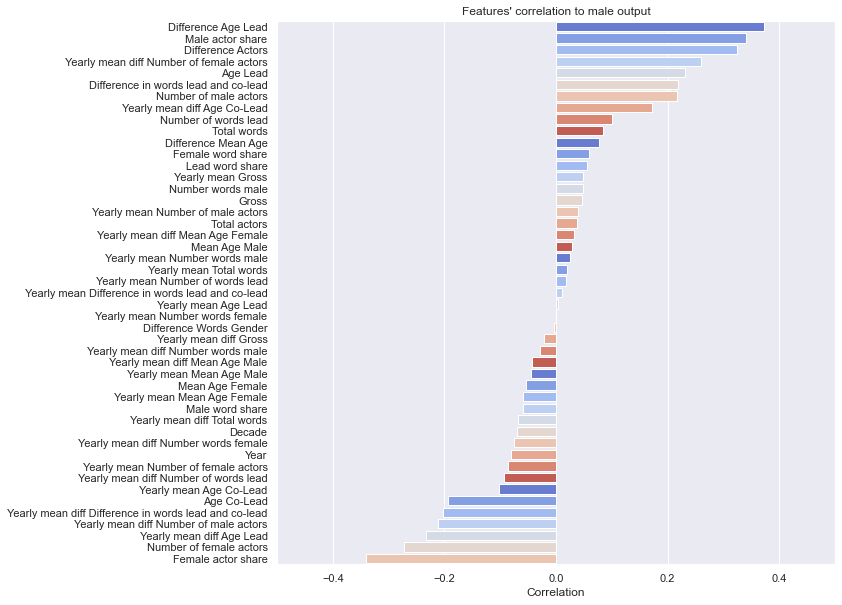

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use Spearman correlation to measure the correlation between features and output 'lead'
corr = df[df.columns[1:]].corr(method="spearman")["Lead"][:]
corr = corr.drop(labels=["Lead"])

# Prepare data
corr2 = corr.sort_values(ascending=False)
features_ = list(corr2.keys())
values = []
for feature in features_:
    values.append(corr2[feature])

# Plot correlation
sns.set_theme(style="darkgrid")
f, ax = plt.subplots(figsize=(10, 10))
diverging_colors = sns.color_palette("coolwarm", 10)
sns.barplot(x=values, y=features_, palette=diverging_colors)
ax.set(
    xlim=(-0.5, 0.5),
    ylabel="",
    xlabel="Correlation",
    title="Features' correlation to male output",
)

[Text(0.5, 1.0, 'Heatmap - Correlation of features')]

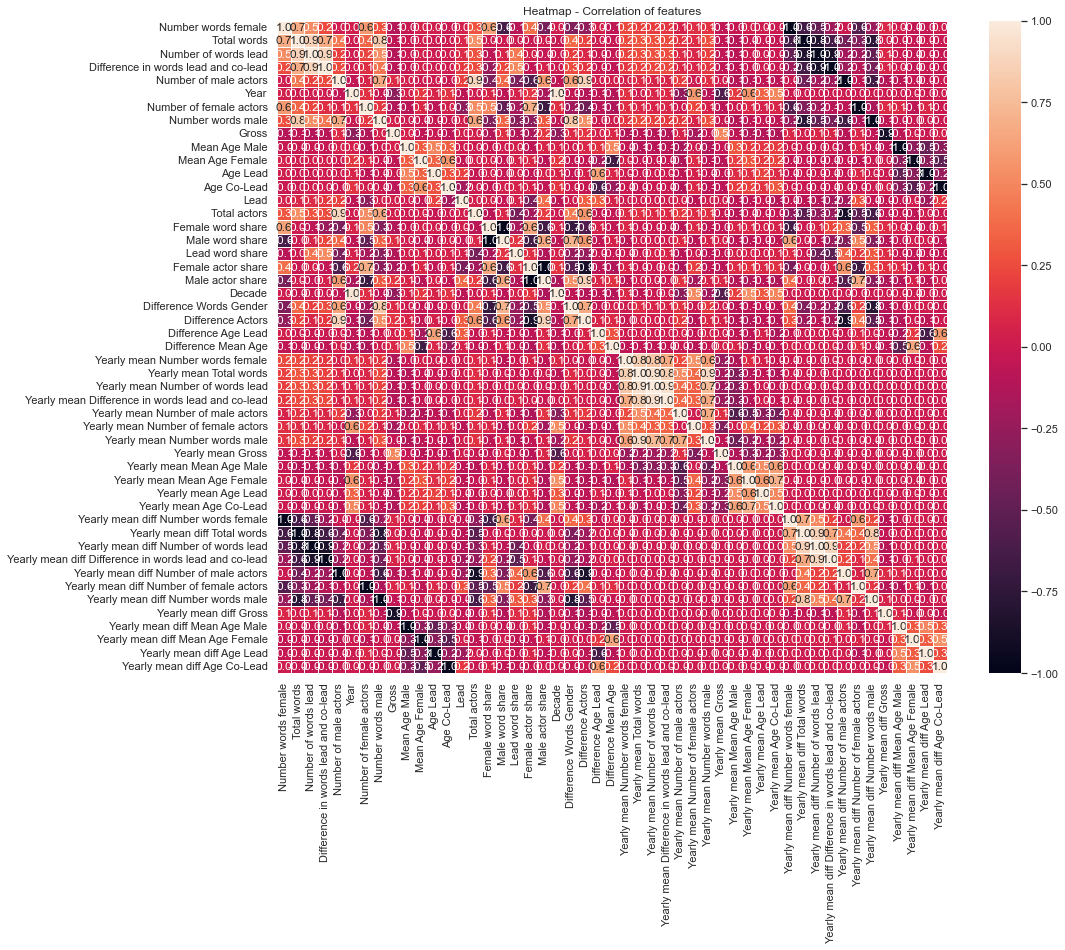

In [25]:
# Plot heatmap of correlation
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, fmt=".1f", ax=ax)
ax.set(title="Heatmap - Correlation of features")

<Figure size 432x288 with 0 Axes>

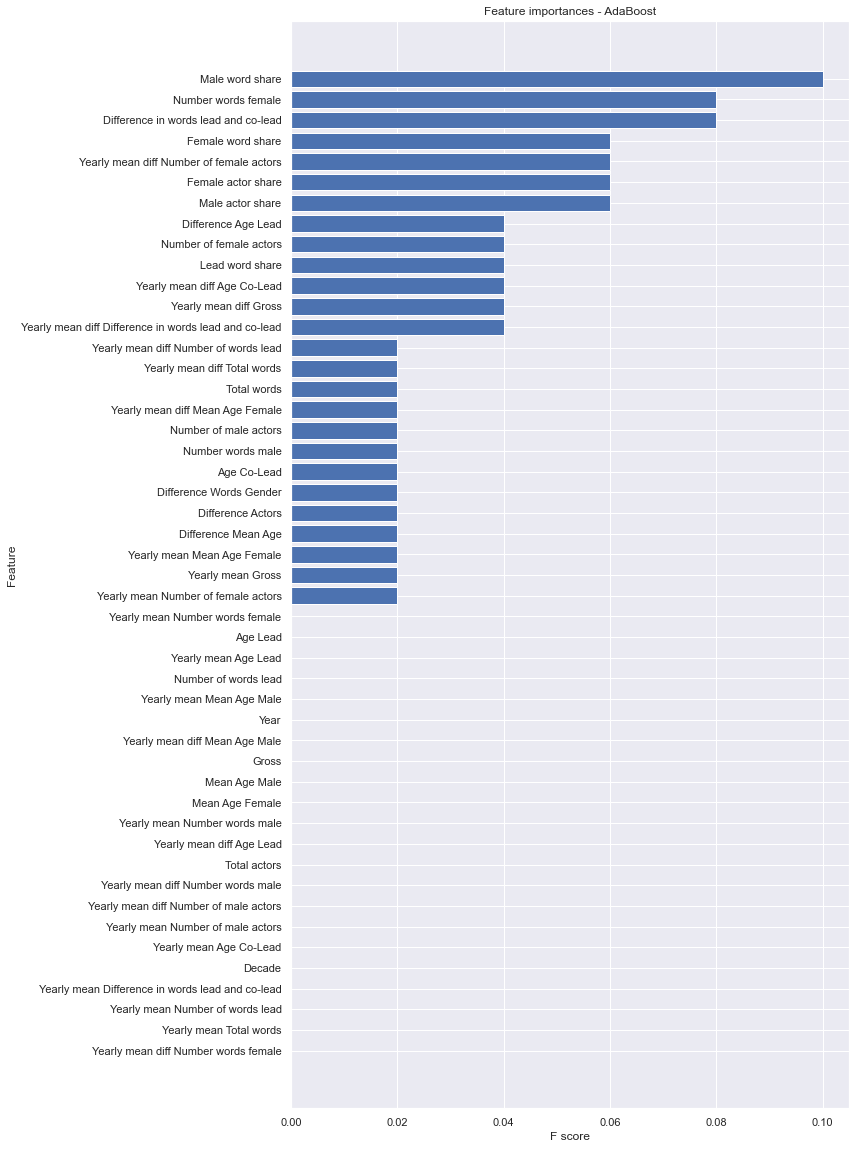

In [26]:
def plotFeatureImportances(features, importances, modelName):
    y_pos = np.arange(features.size)
    plt.clf()
    indexes = np.argsort(importances)
    plt.figure(figsize=(10, 20))
    plt.title("Feature importances - " + modelName)
    plt.barh(y_pos, np.sort(importances))
    plt.yticks(y_pos, features[indexes])
    plt.xlabel("F score")
    plt.ylabel("Feature")
    plt.show()


# Create AdaBoost Classifier
Ada = AdaBoostClassifier()
Ada.fit(features, target)


plotFeatureImportances(features.columns, Ada.feature_importances_, "AdaBoost")

Creating a bunch of new features seems to improve performance a bit, however, there are quite many of the features which correlates with each other, we should try to reduce the amount of features which add no additional information for our model and instead keep the best which should hopefully improve the performance of our model.

### Feature Selection

We choose the features which have low feature importance to our model.

In [28]:
# Find all features which have less than 0.02 importance and add them to list
zero_features = [
    i
    for i in range(len(Ada.feature_importances_))
    if Ada.feature_importances_[i] <= 0.02
]

# Drop all features with less than 0.02 importance
sel_features = features.drop(features.columns[zero_features], axis=1)
sel_features.head()

[1, 2, 4, 5, 7, 8, 9, 10, 11, 12, 13, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 40, 42, 44, 45, 46]
(1039, 13)


,Number words female,Difference in words lead and co-lead,Number of female actors,Female word share,Male word share,Lead word share,Female actor share,Male actor share,Difference Age Lead,Yearly mean diff Difference in words lead and co-lead,Yearly mean diff Number of female actors,Yearly mean diff Gross,Yearly mean diff Age Co-Lead
0,-0.381349,-0.873668,0.715098,0.187243,-0.187243,-0.172223,2.463347,-2.463347,-1.508467,1.402539,-4.201295e-01,-0.490362,-2.619605
1,-0.375783,-0.522923,0.236061,-0.296025,0.296025,-1.167466,-0.096459,0.096459,1.409392,0.611503,-3.061895e-01,0.522117,-0.035262
2,-1.010703,-0.695893,-1.201051,-1.344536,1.344536,-1.204130,-1.246642,1.246642,0.391534,0.054247,-2.021110e-17,-0.773340,0.391406
3,-0.584950,0.039229,-0.722014,-0.793140,0.793140,-0.196598,-1.134218,1.134218,0.459391,-0.230890,5.724412e-01,0.695474,0.973225
4,-0.471787,0.249836,0.236061,-0.313470,0.313470,1.025364,0.064971,-0.064971,-0.422752,-0.428968,-2.627017e-01,0.640912,-0.139166


In [36]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Split data
X_train, X_test, y_train, y_test = train_test_split(features, target)

# Initiate model
Ada = AdaBoostClassifier()

# Choose 12 best features through sequential feature selection
sfs12 = SFS(Ada, k_features=12).fit(X_train, y_train)

In [39]:
sfs12.k_feature_names_

('Number of words lead',
 'Difference in words lead and co-lead',
 'Number of male actors',
 'Female word share',
 'Male word share',
 'Lead word share',
 'Female actor share',
 'Male actor share',
 'Decade',
 'Difference Age Lead',
 'Yearly mean Number words male',
 'Yearly mean Mean Age Male')

In [ ]:
select_features_12 = df[
    [
        "Number of words lead",
        "Difference in words lead and co-lead",
        "Number of male actors",
        "Female word share",
        "Male word share",
        "Lead word share",
        "Female actor share",
        "Male actor share",
        "Decade",
        "Difference Age Lead",
        "Yearly mean Number words male",
        "Yearly mean Mean Age Male",
    ]
]

In [43]:
# Evaluate performance
CV.cross_val(Ada, select_features_12, target, 5)

----------- Cross-validation report -----------

Model: AdaBoostClassifier()

Feature set: ['Number of words lead', 'Difference in words lead and co-lead', 'Number of male actors', 'Female word share', 'Male word share', 'Lead word share', 'Female actor share', 'Male actor share', 'Decade', 'Difference Age Lead', 'Yearly mean Number words male', 'Yearly mean Mean Age Male']

Number of folds: 5

Performance:
- Accuracy: 0.871 (avg), 0.846 (min), 0.913 (max)
- Accuracy, 95.0 % confidence interval: 0.777-0.965
- Accuracy, female: 0.701 (avg), 0.608 (min), 0.804 (max)
- Accuracy, male: 0.926 (avg), 0.898 (min), 0.949 (max)
- Training accuracy: 0.919 (avg), 0.911 (min), 0.927 (max)
---------------------------------------------



In [33]:
from sklearn.feature_selection import SelectFromModel

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target)
# Fit model
Ada = AdaBoostClassifier(tree(max_depth=2))
Ada.fit(X_train, y_train)

# Create thresholds from feature importance
thresholds = np.sort(Ada.feature_importances_)
print(thresholds)

for thresh in thresholds:
    # Select features using threshold
    selection = SelectFromModel(Ada, threshold=thresh, prefit=True)
    select_features = selection.transform(X_train)
    feature_index = selection.get_support()
    select_features = df[df.columns.drop("Lead")[feature_index]]

    # Evaluate selected features
    Ada = AdaBoostClassifier(tree(max_depth=2))
    Ada.fit(X_train, y_train)
    print(thresh)
    CV.cross_val(Ada, select_features, target, 5)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.00035262 0.00263894
 0.0033988  0.00545865 0.0054639  0.00560095 0.00647865 0.00653854
 0.00676184 0.00920797 0.00932989 0.01109875 0.01170951 0.01371225
 0.01712677 0.01872225 0.02075393 0.02118247 0.02297337 0.02354829
 0.02784738 0.02802963 0.02812531 0.02874008 0.02910312 0.02937673
 0.03681117 0.03813943 0.04046945 0.04250799 0.0463284  0.0466773
 0.05163249 0.05311001 0.054108   0.05735652 0.06368653 0.07589213]


C:\Users\yanci\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


0.0
----------- Cross-validation report -----------

Model: AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2))

Feature set: ['Number words female', 'Total words', 'Number of words lead', 'Difference in words lead and co-lead', 'Number of male actors', 'Year', 'Number of female actors', 'Number words male', 'Gross', 'Mean Age Male', 'Mean Age Female', 'Age Lead', 'Age Co-Lead', 'Total actors', 'Female word share', 'Male word share', 'Lead word share', 'Female actor share', 'Male actor share', 'Decade', 'Difference Words Gender', 'Difference Actors', 'Difference Age Lead', 'Difference Mean Age', 'Yearly mean Number words female', 'Yearly mean Total words', 'Yearly mean Number of words lead', 'Yearly mean Difference in words lead and co-lead', 'Yearly mean Number of male actors', 'Yearly mean Number of female actors', 'Yearly mean Number words male', 'Yearly mean Gross', 'Yearly mean Mean Age Male', 'Yearly mean Mean Age Female', 'Yearly mean Age Lead', 'Yearly mean A

C:\Users\yanci\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


0.0
----------- Cross-validation report -----------

Model: AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2))

Feature set: ['Number words female', 'Total words', 'Number of words lead', 'Difference in words lead and co-lead', 'Number of male actors', 'Year', 'Number of female actors', 'Number words male', 'Gross', 'Mean Age Male', 'Mean Age Female', 'Age Lead', 'Age Co-Lead', 'Total actors', 'Female word share', 'Male word share', 'Lead word share', 'Female actor share', 'Male actor share', 'Decade', 'Difference Words Gender', 'Difference Actors', 'Difference Age Lead', 'Difference Mean Age', 'Yearly mean Number words female', 'Yearly mean Total words', 'Yearly mean Number of words lead', 'Yearly mean Difference in words lead and co-lead', 'Yearly mean Number of male actors', 'Yearly mean Number of female actors', 'Yearly mean Number words male', 'Yearly mean Gross', 'Yearly mean Mean Age Male', 'Yearly mean Mean Age Female', 'Yearly mean Age Lead', 'Yearly mean A

C:\Users\yanci\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


0.0
----------- Cross-validation report -----------

Model: AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2))

Feature set: ['Number words female', 'Total words', 'Number of words lead', 'Difference in words lead and co-lead', 'Number of male actors', 'Year', 'Number of female actors', 'Number words male', 'Gross', 'Mean Age Male', 'Mean Age Female', 'Age Lead', 'Age Co-Lead', 'Total actors', 'Female word share', 'Male word share', 'Lead word share', 'Female actor share', 'Male actor share', 'Decade', 'Difference Words Gender', 'Difference Actors', 'Difference Age Lead', 'Difference Mean Age', 'Yearly mean Number words female', 'Yearly mean Total words', 'Yearly mean Number of words lead', 'Yearly mean Difference in words lead and co-lead', 'Yearly mean Number of male actors', 'Yearly mean Number of female actors', 'Yearly mean Number words male', 'Yearly mean Gross', 'Yearly mean Mean Age Male', 'Yearly mean Mean Age Female', 'Yearly mean Age Lead', 'Yearly mean A

C:\Users\yanci\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


0.0
----------- Cross-validation report -----------

Model: AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2))

Feature set: ['Number words female', 'Total words', 'Number of words lead', 'Difference in words lead and co-lead', 'Number of male actors', 'Year', 'Number of female actors', 'Number words male', 'Gross', 'Mean Age Male', 'Mean Age Female', 'Age Lead', 'Age Co-Lead', 'Total actors', 'Female word share', 'Male word share', 'Lead word share', 'Female actor share', 'Male actor share', 'Decade', 'Difference Words Gender', 'Difference Actors', 'Difference Age Lead', 'Difference Mean Age', 'Yearly mean Number words female', 'Yearly mean Total words', 'Yearly mean Number of words lead', 'Yearly mean Difference in words lead and co-lead', 'Yearly mean Number of male actors', 'Yearly mean Number of female actors', 'Yearly mean Number words male', 'Yearly mean Gross', 'Yearly mean Mean Age Male', 'Yearly mean Mean Age Female', 'Yearly mean Age Lead', 'Yearly mean A

C:\Users\yanci\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


0.0
----------- Cross-validation report -----------

Model: AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2))

Feature set: ['Number words female', 'Total words', 'Number of words lead', 'Difference in words lead and co-lead', 'Number of male actors', 'Year', 'Number of female actors', 'Number words male', 'Gross', 'Mean Age Male', 'Mean Age Female', 'Age Lead', 'Age Co-Lead', 'Total actors', 'Female word share', 'Male word share', 'Lead word share', 'Female actor share', 'Male actor share', 'Decade', 'Difference Words Gender', 'Difference Actors', 'Difference Age Lead', 'Difference Mean Age', 'Yearly mean Number words female', 'Yearly mean Total words', 'Yearly mean Number of words lead', 'Yearly mean Difference in words lead and co-lead', 'Yearly mean Number of male actors', 'Yearly mean Number of female actors', 'Yearly mean Number words male', 'Yearly mean Gross', 'Yearly mean Mean Age Male', 'Yearly mean Mean Age Female', 'Yearly mean Age Lead', 'Yearly mean A

C:\Users\yanci\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


0.0
----------- Cross-validation report -----------

Model: AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2))

Feature set: ['Number words female', 'Total words', 'Number of words lead', 'Difference in words lead and co-lead', 'Number of male actors', 'Year', 'Number of female actors', 'Number words male', 'Gross', 'Mean Age Male', 'Mean Age Female', 'Age Lead', 'Age Co-Lead', 'Total actors', 'Female word share', 'Male word share', 'Lead word share', 'Female actor share', 'Male actor share', 'Decade', 'Difference Words Gender', 'Difference Actors', 'Difference Age Lead', 'Difference Mean Age', 'Yearly mean Number words female', 'Yearly mean Total words', 'Yearly mean Number of words lead', 'Yearly mean Difference in words lead and co-lead', 'Yearly mean Number of male actors', 'Yearly mean Number of female actors', 'Yearly mean Number words male', 'Yearly mean Gross', 'Yearly mean Mean Age Male', 'Yearly mean Mean Age Female', 'Yearly mean Age Lead', 'Yearly mean A

C:\Users\yanci\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


0.0
----------- Cross-validation report -----------

Model: AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2))

Feature set: ['Number words female', 'Total words', 'Number of words lead', 'Difference in words lead and co-lead', 'Number of male actors', 'Year', 'Number of female actors', 'Number words male', 'Gross', 'Mean Age Male', 'Mean Age Female', 'Age Lead', 'Age Co-Lead', 'Total actors', 'Female word share', 'Male word share', 'Lead word share', 'Female actor share', 'Male actor share', 'Decade', 'Difference Words Gender', 'Difference Actors', 'Difference Age Lead', 'Difference Mean Age', 'Yearly mean Number words female', 'Yearly mean Total words', 'Yearly mean Number of words lead', 'Yearly mean Difference in words lead and co-lead', 'Yearly mean Number of male actors', 'Yearly mean Number of female actors', 'Yearly mean Number words male', 'Yearly mean Gross', 'Yearly mean Mean Age Male', 'Yearly mean Mean Age Female', 'Yearly mean Age Lead', 'Yearly mean A

C:\Users\yanci\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


0.0
----------- Cross-validation report -----------

Model: AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2))

Feature set: ['Number words female', 'Total words', 'Number of words lead', 'Difference in words lead and co-lead', 'Number of male actors', 'Year', 'Number of female actors', 'Number words male', 'Gross', 'Mean Age Male', 'Mean Age Female', 'Age Lead', 'Age Co-Lead', 'Total actors', 'Female word share', 'Male word share', 'Lead word share', 'Female actor share', 'Male actor share', 'Decade', 'Difference Words Gender', 'Difference Actors', 'Difference Age Lead', 'Difference Mean Age', 'Yearly mean Number words female', 'Yearly mean Total words', 'Yearly mean Number of words lead', 'Yearly mean Difference in words lead and co-lead', 'Yearly mean Number of male actors', 'Yearly mean Number of female actors', 'Yearly mean Number words male', 'Yearly mean Gross', 'Yearly mean Mean Age Male', 'Yearly mean Mean Age Female', 'Yearly mean Age Lead', 'Yearly mean A

C:\Users\yanci\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


0.0
----------- Cross-validation report -----------

Model: AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2))

Feature set: ['Number words female', 'Total words', 'Number of words lead', 'Difference in words lead and co-lead', 'Number of male actors', 'Year', 'Number of female actors', 'Number words male', 'Gross', 'Mean Age Male', 'Mean Age Female', 'Age Lead', 'Age Co-Lead', 'Total actors', 'Female word share', 'Male word share', 'Lead word share', 'Female actor share', 'Male actor share', 'Decade', 'Difference Words Gender', 'Difference Actors', 'Difference Age Lead', 'Difference Mean Age', 'Yearly mean Number words female', 'Yearly mean Total words', 'Yearly mean Number of words lead', 'Yearly mean Difference in words lead and co-lead', 'Yearly mean Number of male actors', 'Yearly mean Number of female actors', 'Yearly mean Number words male', 'Yearly mean Gross', 'Yearly mean Mean Age Male', 'Yearly mean Mean Age Female', 'Yearly mean Age Lead', 'Yearly mean A

C:\Users\yanci\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


0.0
----------- Cross-validation report -----------

Model: AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2))

Feature set: ['Number words female', 'Total words', 'Number of words lead', 'Difference in words lead and co-lead', 'Number of male actors', 'Year', 'Number of female actors', 'Number words male', 'Gross', 'Mean Age Male', 'Mean Age Female', 'Age Lead', 'Age Co-Lead', 'Total actors', 'Female word share', 'Male word share', 'Lead word share', 'Female actor share', 'Male actor share', 'Decade', 'Difference Words Gender', 'Difference Actors', 'Difference Age Lead', 'Difference Mean Age', 'Yearly mean Number words female', 'Yearly mean Total words', 'Yearly mean Number of words lead', 'Yearly mean Difference in words lead and co-lead', 'Yearly mean Number of male actors', 'Yearly mean Number of female actors', 'Yearly mean Number words male', 'Yearly mean Gross', 'Yearly mean Mean Age Male', 'Yearly mean Mean Age Female', 'Yearly mean Age Lead', 'Yearly mean A

C:\Users\yanci\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


0.00035261522204846205
----------- Cross-validation report -----------

Model: AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2))

Feature set: ['Number words female', 'Total words', 'Number of words lead', 'Difference in words lead and co-lead', 'Number of male actors', 'Number of female actors', 'Number words male', 'Gross', 'Mean Age Male', 'Mean Age Female', 'Age Lead', 'Age Co-Lead', 'Female word share', 'Male word share', 'Lead word share', 'Female actor share', 'Male actor share', 'Difference Words Gender', 'Difference Actors', 'Difference Age Lead', 'Difference Mean Age', 'Yearly mean Total words', 'Yearly mean Number of words lead', 'Yearly mean Number of female actors', 'Yearly mean Mean Age Male', 'Yearly mean Age Lead', 'Yearly mean Age Co-Lead', 'Yearly mean diff Number words female', 'Yearly mean diff Total words', 'Yearly mean diff Number of words lead', 'Yearly mean diff Difference in words lead and co-lead', 'Yearly mean diff Number of male actors',

C:\Users\yanci\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


ValueError: X has a different shape than during fitting.

In [ ]:
# Best feature threshold
best_thresh = 0.016752652340812434

# Select features
selection = SelectFromModel(Ada, threshold=best_thresh, prefit=True)
select_features = selection.transform(X_train)
feature_index = selection.get_support()
select_features = df[df.columns.drop("Lead")[feature_index]]

# Evaluate Adaboost with features from threshold
CV.cross_val(Ada, select_features, target, 5)

# Evaluate Adaboost with selected features with low importance
CV.cross_val(Ada, sel_features, target, 5)

In [15]:
print("Features chosen with threhold:")
print(select_features.columns)
print("Features chosen with low importance")
print(sel_features.columns)

Features chosen with threhold:
Index(['Number words female', 'Total words', 'Number of words lead',
       'Difference in words lead and co-lead', 'Gross', 'Mean Age Male',
       'Mean Age Female', 'Age Lead', 'Yearl Number of female actors',
       'Female word share', 'Male word share', 'Female actor share',
       'Male actor share', 'YearlD Number words female', 'YearlD Total words',
       'YearlD Difference in words lead and co-lead',
       'YearlD Number of male actors', 'YearlD Number of female actors',
       'YearlD Mean Age Female', 'YearlD Age Co-Lead', 'Diff Words Gender',
       'Diff Actors'],
      dtype='object')
Features chosen with low importance
Index(['Number words female', 'Total words',
       'Difference in words lead and co-lead', 'Number of male actors',
       'Number of female actors', 'Female word share', 'Male word share',
       'Female actor share', 'Male actor share', 'YearlD Number of words lead',
       'YearlD Difference in words lead and co-lead',

Feature selection did improve the performance a bit.

### Hyperparameter tuning

We do some hyperparameter tuning which could improve the model's performance.

In [44]:
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results["rank_test_score"] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print(
                "Mean validation score: {0:.3f} (std: {1:.3f})".format(
                    results["mean_test_score"][candidate],
                    results["std_test_score"][candidate],
                )
            )
            print("Parameters: {0}".format(results["params"][candidate]))
            print("")

In [47]:
#Split data
X_train, X_test, y_train, y_test = train_test_split(select_features_12, target)

#Choose parameter values to search through
params = {
    "learning_rate": uniform(0.01, 0.3),  # default 0.1
    "n_estimators": [10, 50, 100, 150, 200, 250, 300, 350, 400],  # default 100
    "base_estimator": [
        tree(max_depth=1),
        tree(max_depth=2),
        tree(max_depth=3),
        tree(max_depth=4),
    ],
}

#Create AdaBoost model
Ada = AdaBoostClassifier()

#Search different parameter values
search = RandomizedSearchCV(
    Ada,
    param_distributions=params,
    random_state=42,
    n_iter=1000,
    cv=5,
    verbose=1,
    n_jobs=5,
    scoring="accuracy",
    return_train_score=True,
)

#Fit the search
search.fit(X_train, y_train)

#Print the best result of parameter values
report_best_scores(search.cv_results_, 1)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
Model with rank: 1
Mean validation score: 0.892 (std: 0.026)
Parameters: {'base_estimator': DecisionTreeClassifier(max_depth=4), 'learning_rate': 0.12180606012821478, 'n_estimators': 250}



In [62]:
# Create Hyperparameterer tuned AdaBoost
Ada_tuned = AdaBoostClassifier(
    tree(max_depth=2), learning_rate=0.10180606012821478, n_estimators=250
)
# Evaluate AdaBoost tuned
CV.cross_val(Ada_tuned, select_features_12, target, 5)

----------- Cross-validation report -----------

Model: AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.10180606012821478, n_estimators=250)

Feature set: ['Number of words lead', 'Difference in words lead and co-lead', 'Number of male actors', 'Female word share', 'Male word share', 'Lead word share', 'Female actor share', 'Male actor share', 'Decade', 'Difference Age Lead', 'Yearly mean Number words male', 'Yearly mean Mean Age Male']

Number of folds: 5

Performance:
- Accuracy: 0.888 (avg), 0.870 (min), 0.928 (max)
- Accuracy, 95.0 % confidence interval: 0.794-0.983
- Accuracy, female: 0.685 (avg), 0.588 (min), 0.784 (max)
- Accuracy, male: 0.954 (avg), 0.930 (min), 0.975 (max)
- Training accuracy: 0.987 (avg), 0.982 (min), 0.990 (max)
---------------------------------------------



In [25]:
#Calculate average false positive and negative rate
FpositiveRate = []
FnegativeRate = []
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(
    select_features, target)
    Ada_tuned = AdaBoostClassifier(tree(max_depth=2), learning_rate=0.06, n_estimators=282)
    Ada_tuned.fit(X_train, y_train)
    pred = Ada_tuned.predict(X_test)
    falseNegative = 0
    falsePositive = 0
    for p, t in zip(pred, y_test):
        if p == 1 and t == 0:
            falseNegative += 1
        if p == 0 and t == 1:
            falsePositive += 1
    #print("False positive rate:", falsePositive / len(y_test))
    FpositiveRate.append(falsePositive / len(y_test))
    #print("False negative rate:", falseNegative / len(y_test))
    FnegativeRate.append(falseNegative / len(y_test))
print("Average positive rate:",np.mean(FpositiveRate))
print("Average negative rate:",np.mean(FnegativeRate))

Average positive rate: 0.04153846153846154
Average negative rate: 0.0976923076923077


In [ ]:
column_list2 = []
counter = 0
for column in df.columns.drop('Lead'):
    for j in sel_features.columns:
        if j == column:
            column_list2.append(counter)
    counter += 1
print(column_list2)
print(len(column_list2))

Hyperparameter tuning improved the average performance slightly.

## Improved XGBoost

### Feature Engineering

In [36]:
# Create XGB model
xgb_model = xgb.XGBClassifier(objective="binary:logistic")

# Initialize unscaled df
df = df_initial.copy()

# Scaling with standard
FE.scaling(df, "Standard")
features = df[df.columns.drop("Lead")]
target = df["Lead"]

# Evaluate Adaboost
cross_val(xgb_model, features, target, 5)

# Initialize unscaled df
df = df_initial.copy()

# Scaling with MinMax
FE.scaling(df, "MinMax")
features = df[df.columns.drop("Lead")]
target = df["Lead"]

# Evaluate Adaboost
cross_val(xgb_model, features, target, 5)

# Initialize unscaled df
df = df_initial.copy()

# Scaling with MaxAbs
FE.scaling(df, "MaxAbs")
features = df[df.columns.drop("Lead")]
target = df["Lead"]

# Evaluate Adaboost
cross_val(xgb_model, features, target, 5)

# Initialize unscaled df
df = df_initial.copy()

# Scaling with Robust
FE.scaling(df, "Robust")
features = df[df.columns.drop("Lead")]
target = df["Lead"]

# Evaluate Adaboost
cross_val(xgb_model, features, target, 5)

----------- Cross-validation report -----------

Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Feature set: ['Number words female', 'Total words', 'Number of words lead', 'Difference in words lead and co-lead', 'Number of male actors', 'Year', 'Number of female actors', 'Number words m

Scaling did not improve the performance, let us try some feature creation

In [58]:
# Initialize unscaled df
df = df_initial.copy()

# Create lists with features that will be used in feature creation
origFeatures = [
    "Number words female",
    "Total words",
    "Number of words lead",
    "Difference in words lead and co-lead",
    "Number of male actors",
    "Number of female actors",
    "Number words male",
    "Gross",
    "Mean Age Male",
    "Mean Age Female",
    "Age Lead",
    "Age Co-Lead",
]
mean_yearly = [
    "Yearl Number words female",
    "Yearl Total words",
    "Yearl Number of words lead",
    "Yearl Difference in words lead and co-lead",
    "Yearl Number of male actors",
    "Yearl Number of female actors",
    "Yearl Number words male",
    "Yearl Gross",
    "Yearl Mean Age Male",
    "Yearl Mean Age Female",
    "Yearl Age Lead",
    "Yearl Age Co-Lead",
]
mean_diff_yearly = [
    "YearlD Number words female",
    "YearlD Total words",
    "YearlD Number of words lead",
    "YearlD Difference in words lead and co-lead",
    "YearlD Number of male actors",
    "YearlD Number of female actors",
    "YearlD Number words male",
    "YearlD Gross",
    "YearlD Mean Age Male",
    "YearlD Mean Age Female",
    "YearlD Age Lead",
    "YearlD Age Co-Lead",
]

# Calculate the yearly mean for all features and adds them to dataframe
for orig, name in zip(origFeatures, mean_yearly):
    df[name] = FE.calculate_mean_yearly(df, orig)

# Calculate relative shares of words and actors
FE.calculate_relative_shares_no_lead(df)

# Take the difference of the yearly mean and the original feature
for orig, yearl, name in zip(origFeatures, mean_yearly, mean_diff_yearly):
    df[name] = FE.calculate_difference(df, yearl, orig)

# Calculate difference in words by gender
df["Diff Words Gender"] = FE.calculate_difference(
    df, "Number words male", "Number words female"
)

# Calculdate difference of actors by gender
df["Diff Actors"] = FE.calculate_difference(
    df, "Number of male actors", "Number of female actors"
)

# Use standard scaling
FE.scaling(df, method="Standard")
features = df[df.columns.drop("Lead")]
target = df["Lead"]

# Evaluate xgb model
cross_val(xgb_model, features, target, 5)

----------- Cross-validation report -----------

Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Feature set: ['Number words female', 'Total words', 'Number of words lead', 'Difference in words lead and co-lead', 'Number of male actors', 'Year', 'Number of female actors', 'Number words m

Adding all these features actually decreased the performance of the model. Let us do some feature selection to select 
the most important features which will hopefully increase the performance.

### Feature selection

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

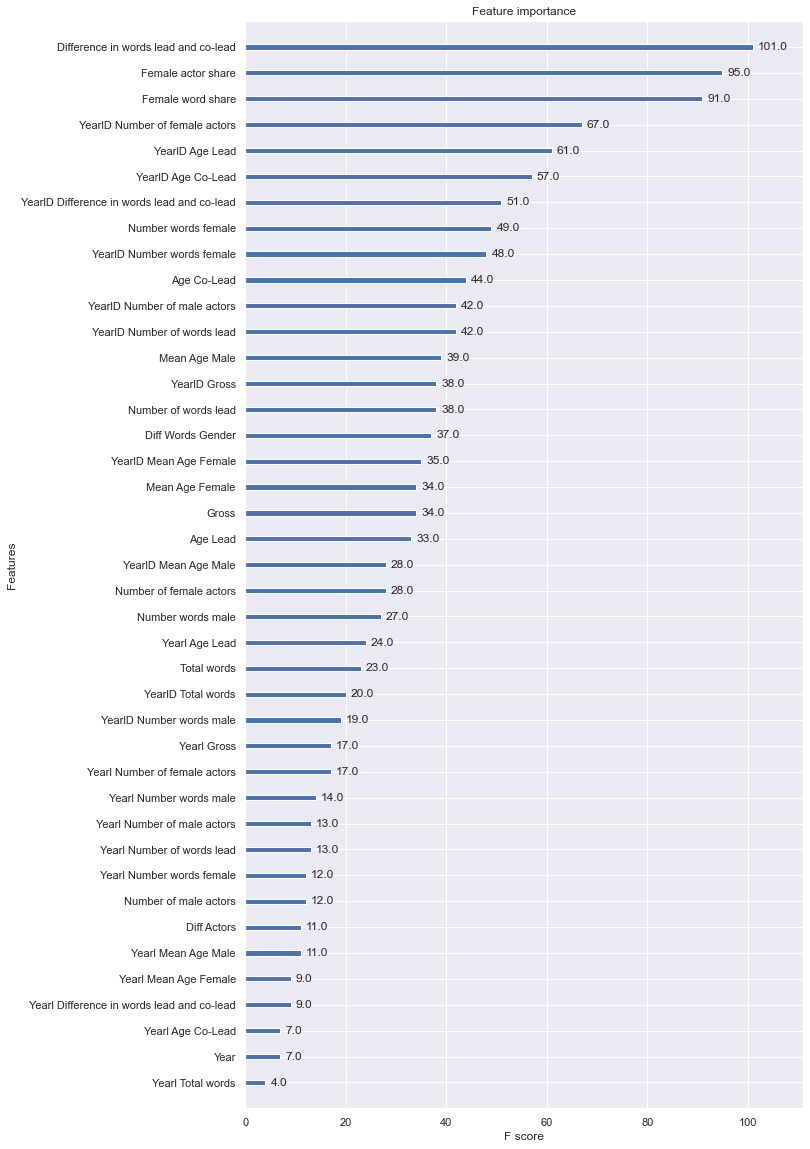

In [59]:
def my_plot_importance(booster, figsize, **kwargs):
    from xgboost import plot_importance

    fig, ax = plt.subplots(1, 1, figsize=figsize)
    return plot_importance(booster=booster, ax=ax, **kwargs)


# Create XGB model
xgb_model = xgb.XGBClassifier(objective="binary:logistic")
xgb_model.fit(features, target)


# Plot feature importance
my_plot_importance(xgb_model, (10, 20))

In [60]:
from sklearn.feature_selection import SelectFromModel
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.33,random_state=7
)
#Fit model
model = xgb.XGBClassifier(objective="binary:logistic")
model.fit(X_train, y_train)

#Create thresholds from feature importance
thresholds = np.sort(model.feature_importances_)

for thresh in thresholds:
    # Select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_features = selection.transform(features)
    feature_index = selection.get_support()
    select_features = df[df.columns.drop("Lead")[feature_index]]

    # Evaluate selected features
    xgb_model = xgb.XGBClassifier(objective="binary:logistic")
    print(thresh)
    cross_val(xgb_model, select_features, target, 5)

C:\Users\yanci\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


0.0
----------- Cross-validation report -----------

Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Feature set: ['Number words female', 'Total words', 'Number of words lead', 'Difference in words lead and co-lead', 'Number of male actors', 'Year', 'Number of female actors', 'Number wor

C:\Users\yanci\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


----------- Cross-validation report -----------

Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Feature set: ['Number words female', 'Total words', 'Number of words lead', 'Difference in words lead and co-lead', 'Number of male actors', 'Year', 'Number of female actors', 'Number words m

C:\Users\yanci\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


----------- Cross-validation report -----------

Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Feature set: ['Number words female', 'Total words', 'Number of words lead', 'Difference in words lead and co-lead', 'Number of male actors', 'Year', 'Number of female actors', 'Number words m

C:\Users\yanci\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


----------- Cross-validation report -----------

Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Feature set: ['Number words female', 'Total words', 'Number of words lead', 'Difference in words lead and co-lead', 'Number of male actors', 'Year', 'Number of female actors', 'Number words m

C:\Users\yanci\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


----------- Cross-validation report -----------

Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Feature set: ['Number words female', 'Total words', 'Number of words lead', 'Difference in words lead and co-lead', 'Number of male actors', 'Year', 'Number of female actors', 'Number words m

C:\Users\yanci\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


----------- Cross-validation report -----------

Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Feature set: ['Number words female', 'Total words', 'Number of words lead', 'Difference in words lead and co-lead', 'Number of male actors', 'Number of female actors', 'Number words male', 'G

C:\Users\yanci\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


----------- Cross-validation report -----------

Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Feature set: ['Number words female', 'Total words', 'Number of words lead', 'Difference in words lead and co-lead', 'Number of male actors', 'Number of female actors', 'Number words male', 'G

C:\Users\yanci\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


----------- Cross-validation report -----------

Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Feature set: ['Number words female', 'Total words', 'Number of words lead', 'Difference in words lead and co-lead', 'Number of male actors', 'Number of female actors', 'Number words male', 'G

C:\Users\yanci\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


----------- Cross-validation report -----------

Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Feature set: ['Number words female', 'Total words', 'Number of words lead', 'Difference in words lead and co-lead', 'Number of male actors', 'Number of female actors', 'Number words male', 'G

C:\Users\yanci\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


----------- Cross-validation report -----------

Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Feature set: ['Number words female', 'Total words', 'Number of words lead', 'Difference in words lead and co-lead', 'Number of male actors', 'Number of female actors', 'Number words male', 'M

C:\Users\yanci\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


----------- Cross-validation report -----------

Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Feature set: ['Number words female', 'Total words', 'Number of words lead', 'Difference in words lead and co-lead', 'Number of male actors', 'Number of female actors', 'Number words male', 'M

C:\Users\yanci\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


----------- Cross-validation report -----------

Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Feature set: ['Number words female', 'Total words', 'Number of words lead', 'Difference in words lead and co-lead', 'Number of male actors', 'Number of female actors', 'Number words male', 'M

C:\Users\yanci\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


----------- Cross-validation report -----------

Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Feature set: ['Number words female', 'Number of words lead', 'Difference in words lead and co-lead', 'Number of male actors', 'Number of female actors', 'Number words male', 'Mean Age Male', 

C:\Users\yanci\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


----------- Cross-validation report -----------

Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Feature set: ['Number words female', 'Number of words lead', 'Difference in words lead and co-lead', 'Number of male actors', 'Number of female actors', 'Number words male', 'Mean Age Male', 

C:\Users\yanci\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


----------- Cross-validation report -----------

Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Feature set: ['Number words female', 'Number of words lead', 'Difference in words lead and co-lead', 'Number of male actors', 'Number of female actors', 'Number words male', 'Mean Age Male', 

C:\Users\yanci\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


----------- Cross-validation report -----------

Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Feature set: ['Number words female', 'Number of words lead', 'Difference in words lead and co-lead', 'Number of female actors', 'Number words male', 'Mean Age Male', 'Age Lead', 'Age Co-Lead'

C:\Users\yanci\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


----------- Cross-validation report -----------

Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Feature set: ['Number words female', 'Number of words lead', 'Difference in words lead and co-lead', 'Number of female actors', 'Number words male', 'Mean Age Male', 'Age Lead', 'Age Co-Lead'

C:\Users\yanci\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


----------- Cross-validation report -----------

Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Feature set: ['Number words female', 'Number of words lead', 'Difference in words lead and co-lead', 'Number of female actors', 'Number words male', 'Mean Age Male', 'Age Lead', 'Age Co-Lead'

C:\Users\yanci\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


----------- Cross-validation report -----------

Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Feature set: ['Number words female', 'Number of words lead', 'Difference in words lead and co-lead', 'Number of female actors', 'Number words male', 'Age Lead', 'Age Co-Lead', 'Yearl Total wo

C:\Users\yanci\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


----------- Cross-validation report -----------

Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Feature set: ['Number words female', 'Number of words lead', 'Difference in words lead and co-lead', 'Number of female actors', 'Number words male', 'Age Lead', 'Age Co-Lead', 'Yearl Total wo

C:\Users\yanci\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


----------- Cross-validation report -----------

Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Feature set: ['Number words female', 'Number of words lead', 'Difference in words lead and co-lead', 'Number of female actors', 'Number words male', 'Age Lead', 'Age Co-Lead', 'Yearl Total wo

C:\Users\yanci\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


----------- Cross-validation report -----------

Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Feature set: ['Number words female', 'Number of words lead', 'Difference in words lead and co-lead', 'Number of female actors', 'Number words male', 'Age Lead', 'Age Co-Lead', 'Yearl Total wo

C:\Users\yanci\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


----------- Cross-validation report -----------

Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Feature set: ['Number words female', 'Number of words lead', 'Difference in words lead and co-lead', 'Number of female actors', 'Number words male', 'Age Lead', 'Age Co-Lead', 'Yearl Total wo

C:\Users\yanci\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


----------- Cross-validation report -----------

Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Feature set: ['Number words female', 'Number of words lead', 'Difference in words lead and co-lead', 'Number of female actors', 'Number words male', 'Age Lead', 'Age Co-Lead', 'Yearl Total wo

C:\Users\yanci\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


----------- Cross-validation report -----------

Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Feature set: ['Number words female', 'Number of words lead', 'Difference in words lead and co-lead', 'Number of female actors', 'Number words male', 'Age Lead', 'Age Co-Lead', 'Yearl Total wo

C:\Users\yanci\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


----------- Cross-validation report -----------

Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Feature set: ['Number words female', 'Number of words lead', 'Difference in words lead and co-lead', 'Number of female actors', 'Number words male', 'Age Lead', 'Age Co-Lead', 'Yearl Total wo

C:\Users\yanci\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


----------- Cross-validation report -----------

Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Feature set: ['Number words female', 'Number of words lead', 'Difference in words lead and co-lead', 'Number words male', 'Age Lead', 'Age Co-Lead', 'Yearl Total words', 'Yearl Number of word

C:\Users\yanci\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


----------- Cross-validation report -----------

Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Feature set: ['Number words female', 'Number of words lead', 'Difference in words lead and co-lead', 'Number words male', 'Age Lead', 'Age Co-Lead', 'Yearl Total words', 'Female word share', 

C:\Users\yanci\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


----------- Cross-validation report -----------

Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Feature set: ['Number words female', 'Number of words lead', 'Difference in words lead and co-lead', 'Number words male', 'Age Lead', 'Age Co-Lead', 'Yearl Total words', 'Female word share', 

C:\Users\yanci\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


----------- Cross-validation report -----------

Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Feature set: ['Number words female', 'Number of words lead', 'Difference in words lead and co-lead', 'Age Lead', 'Age Co-Lead', 'Yearl Total words', 'Female word share', 'Female actor share',

C:\Users\yanci\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


----------- Cross-validation report -----------

Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Feature set: ['Number words female', 'Number of words lead', 'Difference in words lead and co-lead', 'Age Lead', 'Age Co-Lead', 'Yearl Total words', 'Female word share', 'Female actor share',

C:\Users\yanci\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


----------- Cross-validation report -----------

Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Feature set: ['Number words female', 'Number of words lead', 'Difference in words lead and co-lead', 'Age Lead', 'Age Co-Lead', 'Female word share', 'Female actor share', 'YearlD Number of fe

C:\Users\yanci\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


----------- Cross-validation report -----------

Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Feature set: ['Number words female', 'Difference in words lead and co-lead', 'Age Lead', 'Age Co-Lead', 'Female word share', 'Female actor share', 'YearlD Number of female actors', 'YearlD Nu

C:\Users\yanci\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


----------- Cross-validation report -----------

Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Feature set: ['Number words female', 'Difference in words lead and co-lead', 'Age Lead', 'Age Co-Lead', 'Female word share', 'Female actor share', 'YearlD Number of female actors', 'YearlD Nu

C:\Users\yanci\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


----------- Cross-validation report -----------

Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Feature set: ['Number words female', 'Difference in words lead and co-lead', 'Age Lead', 'Age Co-Lead', 'Female word share', 'Female actor share', 'YearlD Number of female actors', 'YearlD Nu

C:\Users\yanci\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


----------- Cross-validation report -----------

Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Feature set: ['Number words female', 'Difference in words lead and co-lead', 'Age Lead', 'Age Co-Lead', 'Female word share', 'Female actor share', 'YearlD Number of female actors', 'Diff Word

C:\Users\yanci\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


----------- Cross-validation report -----------

Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Feature set: ['Number words female', 'Difference in words lead and co-lead', 'Age Co-Lead', 'Female word share', 'Female actor share', 'YearlD Number of female actors', 'Diff Words Gender']



C:\Users\yanci\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


----------- Cross-validation report -----------

Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Feature set: ['Number words female', 'Age Co-Lead', 'Female word share', 'Female actor share', 'YearlD Number of female actors', 'Diff Words Gender']

Number of folds: 5

Performance:
- Accur

C:\Users\yanci\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


----------- Cross-validation report -----------

Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Feature set: ['Number words female', 'Age Co-Lead', 'Female actor share', 'YearlD Number of female actors', 'Diff Words Gender']

Number of folds: 5

Performance:
- Accuracy: 0.85 (avg), 0.81

C:\Users\yanci\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


----------- Cross-validation report -----------

Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Feature set: ['Number words female', 'Age Co-Lead', 'Female actor share', 'Diff Words Gender']

Number of folds: 5

Performance:
- Accuracy: 0.83 (avg), 0.78 (min), 0.90 (max)
- Precision: 0.

C:\Users\yanci\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


----------- Cross-validation report -----------

Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Feature set: ['Number words female', 'Female actor share', 'Diff Words Gender']

Number of folds: 5

Performance:
- Accuracy: 0.83 (avg), 0.78 (min), 0.89 (max)
- Precision: 0.87 (avg), 0.82 

C:\Users\yanci\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


----------- Cross-validation report -----------

Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Feature set: ['Number words female', 'Female actor share']

Number of folds: 5

Performance:
- Accuracy: 0.79 (avg), 0.74 (min), 0.83 (max)
- Precision: 0.85 (avg), 0.80 (min), 0.88 (max)
- R

C:\Users\yanci\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


----------- Cross-validation report -----------

Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Feature set: ['Number words female']

Number of folds: 5

Performance:
- Accuracy: 0.72 (avg), 0.69 (min), 0.76 (max)
- Precision: 0.77 (avg), 0.74 (min), 0.79 (max)
- Recall: 0.77 (avg), 0.7

Quite much to sort through, however, through the use of cross validation we can find the set of features which perform the best on average, which in this case was a threshold of 0.020259855

In [61]:
# select features using threshold
#0.012660791
#0.020259855
#0.03640231
#0.014273467
selection = SelectFromModel(model, threshold=0.018047674, prefit=True)
select_features = selection.transform(features)
feature_index = selection.get_support()
select_features = df[df.columns.drop("Lead")[feature_index]]

print("Selected best features:")
print(select_features.columns)

Selected best features:
Index(['Number words female', 'Number of words lead',
       'Difference in words lead and co-lead', 'Number of female actors',
       'Number words male', 'Mean Age Male', 'Age Lead', 'Age Co-Lead',
       'Yearl Total words', 'Yearl Number of words lead',
       'Yearl Number of male actors', 'Yearl Mean Age Female',
       'Yearl Age Co-Lead', 'Female word share', 'Female actor share',
       'YearlD Number words female', 'YearlD Number of words lead',
       'YearlD Difference in words lead and co-lead',
       'YearlD Number of male actors', 'YearlD Number of female actors',
       'YearlD Number words male', 'YearlD Mean Age Male',
       'YearlD Mean Age Female', 'YearlD Age Lead', 'YearlD Age Co-Lead',
       'Diff Words Gender', 'Diff Actors'],
      dtype='object')


C:\Users\yanci\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [62]:
# Evaluate selected best features
xgb_model = xgb.XGBClassifier(objective="binary:logistic")
cross_val(xgb_model, select_features, target, 5)

----------- Cross-validation report -----------

Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Feature set: ['Number words female', 'Number of words lead', 'Difference in words lead and co-lead', 'Number of female actors', 'Number words male', 'Mean Age Male', 'Age Lead', 'Age Co-Lead'

### Hyperparameter tuning

Now we will tune our hyperparameters which should improve the performance of our model further.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    select_features, target
)
params = {
    "learning_rate": uniform(0.25, 0.35),  # default 0.3
    "max_depth": randint(4, 8),  # default 6
    "n_estimators": [80, 90, 100, 110, 120, 130, 70],  # default 100
}

#xgb_model = xgb.XGBClassifier(objective="binary:logistic")
search = RandomizedSearchCV(
    xgb_model,
    param_distributions=params,
    n_iter=200,
    cv=5,
    scoring='accuracy',
    verbose=3,
    n_jobs=3,
    return_train_score=True,
)
search.fit(X_train, y_train)
report_best_scores(search.cv_results_, 1)

In [46]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic"
                             )

cross_val(xgb_model, select_features, target, 5)

----------- Cross-validation report -----------

Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Feature set: ['Number words female', 'Number of words lead', 'Difference in words lead and co-lead', 'Year', 'Number of female actors', 'Number words male', 'Mean Age Female', 'Age Lead', 'Ag

In [63]:
#Calculate average false positive and negative rate
FpositiveRate = []
FnegativeRate = []
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(
    select_features, target)
    xgb_model = xgb.XGBClassifier(objective="binary:logistic"
                             )
    xgb_model.fit(X_train, y_train)
    pred = xgb_model.predict(X_test)
    falseNegative = 0
    falsePositive = 0
    for p, t in zip(pred, y_test):
        if p == 1 and t == 0:
            falseNegative += 1
        if p == 0 and t == 1:
            falsePositive += 1
    #print("False positive rate:", falsePositive / len(y_test))
    FpositiveRate.append(falsePositive / len(y_test))
    #print("False negative rate:", falseNegative / len(y_test))
    FnegativeRate.append(falseNegative / len(y_test))
print("Average positive rate:",np.mean(FpositiveRate))
print("Average negative rate:",np.mean(FnegativeRate))

Average positive rate: 0.036923076923076927
Average negative rate: 0.08384615384615386


In [64]:
column_list = []
counter = 0
for column in df.columns.drop('Lead'):
    for j in select_features.columns:
        if j == column:
            column_list.append(counter)
    counter += 1
print(column_list)
print(len(column_list))

[0, 2, 3, 6, 7, 9, 11, 12, 14, 15, 17, 22, 24, 25, 27, 29, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 42]
27


### Voting Classifier

In [ ]:
print(origFeatures)

In [ ]:
from mlxtend.feature_selection import ColumnSelector
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

ADB_columns = [0, 1, 3, 4, 6, 25, 26, 27, 28, 31, 32, 34, 36, 39, 40, 42]
XGB_columns = [0, 2, 3, 6, 11, 12, 15, 25, 27, 29, 32, 34, 39, 40, 41, 42]
QDA_columns = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1, 12, 26, 27, 28]

# for i in range(len(df.columns.drop('Lead'))):
#     print(df.columns.drop('Lead')[i], i)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    df[df.columns.drop("Lead")], df["Lead"], test_size=0.33, random_state=7
)
pipe1 = make_pipeline(
    ColumnSelector(cols=(0, 1, 3, 4, 6, 25, 26, 27, 28, 31, 32, 34, 36, 39, 40, 42)),
    xgb.XGBClassifier(objective="binary:logistic"),
)
pipe2 = make_pipeline(
    ColumnSelector(cols=(0, 2, 3, 6, 11, 12, 15, 25, 27, 29, 32, 34, 39, 40, 41, 42)),
    AdaBoostClassifier(tree(max_depth=2), learning_rate=0.06, n_estimators=282),
)
pipe3 = make_pipeline(
    ColumnSelector(cols=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1, 12, 26, 27, 28)), QDA()
)

eclf = EnsembleVoteClassifier(clfs=[pipe1, pipe2, pipe3], voting="hard")

eclf.fit(X_train, y_train)
prediction = eclf.predict(X_test)

print(accuracy_score(y_test, prediction))

In [67]:
cross_val(eclf, df[df.columns.drop('Lead')], df['Lead'], 5)

C:\Users\yanci\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\yanci\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\yanci\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\yanci\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


----------- Cross-validation report -----------

Model: EnsembleVoteClassifier(clfs=[Pipeline(steps=[('columnselector',
                                              ColumnSelector(cols=(0, 1, 3, 4,
                                                                   6, 25, 26,
                                                                   27, 28, 31,
                                                                   32, 34, 36,
                                                                   39, 40,
                                                                   42))),
                                             ('xgbclassifier',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            callbacks=None,
                                                            colsample_bylevel=None,
                                          

C:\Users\yanci\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
